<a href="https://colab.research.google.com/github/farhan1503001/Deep-Learning-Rhyme-Projects/blob/main/Fine_Tune_BERT_for_Text_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [21]:
!nvidia-smi

Thu Apr 15 13:50:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    32W / 250W |   1395MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install TensorFlow and TensorFlow Model Garden

In [22]:
import tensorflow as tf
print(tf.version.VERSION)

2.3.0


In [23]:
!pip install -q tensorflow==2.3.0

     |████████████████████████████████| 26.1MB 113kB/s 
ERROR: pandas-gbq 0.13.3 has requirement google-cloud-bigquery[bqstorage,pandas]<2.0.0dev,>=1.11.1, but you'll have google-cloud-bigquery 2.13.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [24]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [25]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.20.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.6.2 which is incompatible.
ERROR: pandas-gbq 0.13.3 has requirement google-cloud-bigquery[bqstorage,pandas]<2.0.0dev,>=1.11.1, but you'll have google-cloud-bigquery 2.13.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


## Restart the Runtime

**Note** 
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [85]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [86]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.3.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataframe=pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',
                      compression='zip',
                      low_memory=False
                      )

print("Shape of the dataset: ",dataframe.shape)
print("Keys of dataset: ",dataframe.keys)


Shape of the dataset:  (1306122, 3)
Keys of dataset:  <bound method NDFrame.keys of                           qid  ... target
0        00002165364db923c7e6  ...      0
1        000032939017120e6e44  ...      0
2        0000412ca6e4628ce2cf  ...      0
3        000042bf85aa498cd78e  ...      0
4        0000455dfa3e01eae3af  ...      0
...                       ...  ...    ...
1306117  ffffcc4e2331aaf1e41e  ...      0
1306118  ffffd431801e5a2f4861  ...      0
1306119  ffffd48fb36b63db010c  ...      0
1306120  ffffec519fa37cf60c78  ...      0
1306121  ffffed09fedb5088744a  ...      0

[1306122 rows x 3 columns]>


In [89]:
dataframe.head(10)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


<AxesSubplot:title={'center':'Target Distribution'}, ylabel='Frequency'>

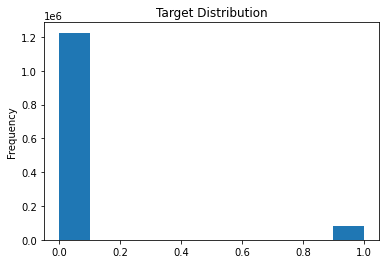

In [90]:
dataframe['target'].plot(kind='hist',title='Target Distribution')

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [139]:
from sklearn.model_selection import train_test_split
train_set,remainder=train_test_split(dataframe,train_size=0.0075,stratify=dataframe['target'].values,random_state=42) 
test_set,_= train_test_split(remainder,train_size=0.00075,stratify=remainder['target'].values, random_state=42)

In [140]:
train_set.shape,test_set.shape

((9795, 3), (972, 3))

In [141]:
#Creating tensorflow dataset for pipelining in tensorflow
#tf.device('/cpu:0') is used for making operation faster
with tf.device('/cpu:0'):
  training_set=tf.data.Dataset.from_tensor_slices((train_set['question_text'].values,train_set['target'].values))
  validation_set=tf.data.Dataset.from_tensor_slices((test_set['question_text'].values,test_set['target'].values))

  for text,label in training_set.take(2):
    print(text)
    print(label)

  
  

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'Which war changed the course of history of the world?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [171]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

 # Label categories
label_list=[0,1] #As we are using multiclass classification here.
 # maximum length of (token) input sequences
max_seq_length=128
batch_size=32


# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer=hub.KerasLayer(handle='https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2',trainable=True)

#Tokenizers importing for Bert model
vocab_file=bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lowercase=bert_layer.resolved_object.do_lower_case.numpy()
tokenizer=tokenization.FullTokenizer(vocab_file=vocab_file,do_lower_case=to_lowercase)

In [172]:
tokenizer.wordpiece_tokenizer.tokenize("hi, i am a painter"),tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing right now')

(['hi', '##,', 'i', 'am', 'a', 'painter'],
 ['hi', '##,', 'how', 'are', 'you', 'doing', 'right', 'now'])

In [173]:
#Now our model cannot work with strings so that they have to converted towards number/tokenids
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize("hi, how are you doing right now ?"))

[7632, 29623, 2129, 2024, 2017, 2725, 2157, 2085, 1029]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [174]:
# This provides a function to convert row to input features and label Token id ,input mask 1 for non-padded token and input type ids

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example=classifier_data_lib.InputExample(guid=None,text_a=text.numpy(),
                                           text_b=None,
                                           label=label.numpy()
                                           )
  feature=classifier_data_lib.convert_single_example(0,example,label_list=label_list,max_seq_length=max_seq_length,tokenizer=tokenizer)

  return (feature.input_ids,feature.input_mask,feature.segment_ids,feature.label_id)

  
  

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [175]:
#As graphs are not accesseble so that function mapping has to be modified
def to_feature_map(text, label):
  input_ids,input_masks,input_type_ids,label_id=tf.py_function(to_feature,inp=[text,label],Tout=[tf.int32,tf.int32,tf.int32,tf.int32])
  
  input_ids.set_shape([max_seq_length])
  input_masks.set_shape([max_seq_length])
  input_type_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x={'input_word_ids':input_ids,
     'input_masks':input_masks,
     'input_type_ids':input_type_ids}


  return (x,label_id)

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [176]:
#Now we will map each input_sample to the _to_feature_map function for converting them for BERT input
with tf.device('/cpu:0'):
  # train
  train_data=(training_set.map(map_func=to_feature_map,
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32,drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE)
  )

  # valid
  validation_data=(validation_set.map(map_func=to_feature_map,num_parallel_calls=tf.data.experimental.AUTOTUNE)
  .batch(32,drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE)
  )
  
  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [177]:
# train data spec
train_data.element_spec

({'input_masks': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [178]:
# valid data spec
validation_data.element_spec

({'input_masks': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [179]:
# Building the model
def create_model():
  input_word_ids=tf.keras.layers.Input(shape=[max_seq_length],dtype=tf.int32,name='input_word_ids')
  input_masks=tf.keras.layers.Input(shape=[max_seq_length],dtype=tf.int32,name='input_masks')
  input_type_ids=tf.keras.layers.Input(shape=[max_seq_length],dtype=tf.int32,name='input_type_ids')
  pooled_output,sequence_output=bert_layer([input_word_ids,input_masks,input_type_ids])

  drop=tf.keras.layers.Dropout(rate=0.48)(pooled_output)
  output=tf.keras.layers.Dense(units=1,activation='sigmoid',name='output')(drop)# Training data is divided into 3 categories input_word_ids,input_masks,input_type_ids
  model=tf.keras.Model(
      inputs={
          'input_word_ids':input_word_ids,
          'input_masks': input_masks,
          'input_type_ids':input_type_ids,
          
      },
      outputs=output
  )
  return model

## Task 10: Fine-Tune BERT for Text Classification

In [180]:
model=create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "functional_36"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer_6 (KerasLayer)      [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_masks[0][0]    

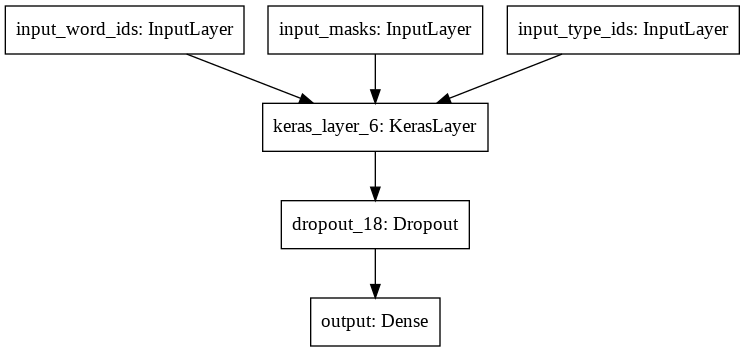

In [181]:
tf.keras.utils.plot_model(model,to_file='model.png')

In [182]:
# Train model
history=model.fit(train_data,epochs=10,validation_data=validation_data,verbose=1,callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2))

Epoch 1/10
306/306 [==============================] - ETA: 0s - loss: 0.1785 - accuracy: 0.9353WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0139s vs `on_test_batch_end` time: 0.1397s). Check your callbacks.


306/306 [==============================] - 148s 485ms/step - loss: 0.1785 - accuracy: 0.9353 - val_loss: 0.1267 - val_accuracy: 0.9521
Epoch 2/10
306/306 [==============================] - 148s 483ms/step - loss: 0.1028 - accuracy: 0.9626 - val_loss: 0.1371 - val_accuracy: 0.9521
Epoch 3/10
306/306 [==============================] - 148s 483ms/step - loss: 0.0554 - accuracy: 0.9809 - val_loss: 0.1668 - val_accuracy: 0.9427


## Task 11: Evaluate the BERT Text Classification Model

In [184]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

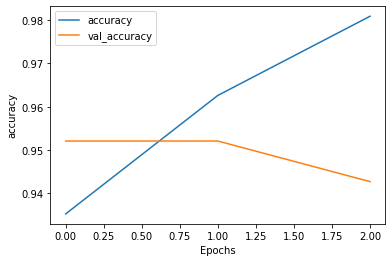

In [185]:
plot_graphs(history,'accuracy')

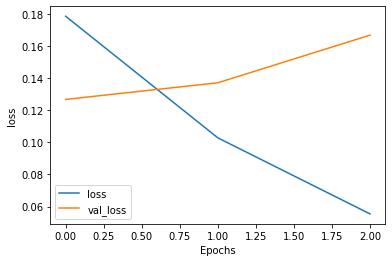

In [186]:
plot_graphs(history,'loss')

In [195]:
sample_string=["Do you need money in life"]
#First convert that sensor
tester=tf.data.Dataset.from_tensor_slices((sample_string,[0]*len(sample_string)))
teststring=(tester.map(map_func=to_feature_map,num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(1))

In [196]:
teststring

<BatchDataset shapes: ({input_word_ids: (None, 128), input_masks: (None, 128), input_type_ids: (None, 128)}, (None,)), types: ({input_word_ids: tf.int32, input_masks: tf.int32, input_type_ids: tf.int32}, tf.int32)>

In [198]:
predict=model.predict(teststring)
print(predict)

[[0.00057866]]


In [199]:
threshold=0.5
if predict>threshold:
  print("Insincere")
else:
  print("Sincere")

Sincere
